# Finding critical point $p_c$

In [2]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import scipy.stats as stats
import glob

In [3]:
sns.set()

In [4]:
root = '../data/site-percolation/critical/'
fig_root = "../figures/"
os.listdir(root)

['sq_lattice_site_percolation_periodic__critical_L300_.txt',
 'sq_lattice_site_percolation_periodic__critical_L100_.txt',
 'sq_lattice_site_percolation_periodic__critical_L400_.txt',
 'sq_lattice_site_percolation_periodic__critical_L200_.txt',
 'append-together.py',
 'sq_lattice_site_percolation_periodic__critical_L350_.txt',
 'sq_lattice_site_percolation_periodic__critical_L250_.txt',
 'sq_lattice_site_percolation_periodic__critical_L150_.txt']

In [5]:
signature = "sq_lattice_site_percolation_periodic"
files = glob.glob(root + signature + "*")

In [6]:
files

['../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L300_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L100_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L400_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L200_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L350_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L250_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L150_.txt']

In [13]:
data = []
pc_dict = dict()
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        L = int(head['length'])
    pcs = np.loadtxt(file, usecols=(0,))
    pc = np.mean(pcs)
    

    data.append([L, pc])
    pc_dict[L] = pc
    pass

In [14]:
pc_dict

{300: 0.58980635624,
 100: 0.58611282,
 400: 0.59032843395,
 200: 0.5887290962499999,
 350: 0.59006588965,
 250: 0.5893111232,
 150: 0.5878822480000001}

In [17]:
data = np.array(data)

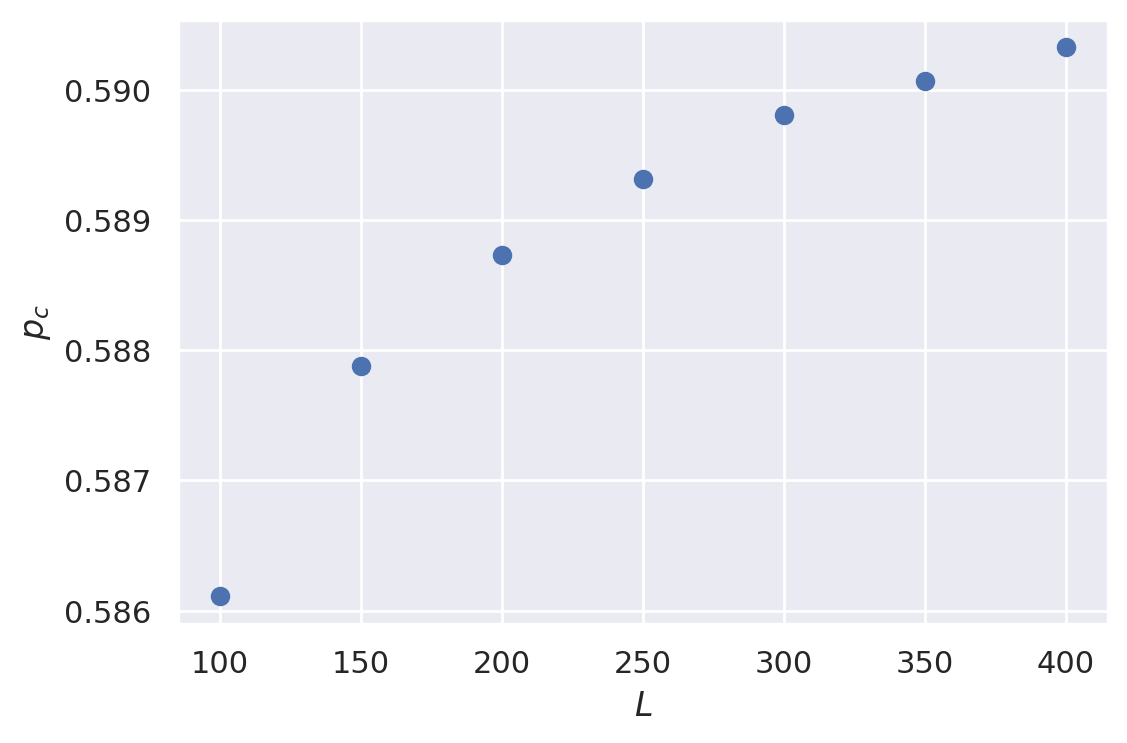

In [8]:
fig = plt.figure(dpi=200)

plt.plot(data[:,0], data[:,1], 'o')
# plt.title(r"$p_c$ vs $L$")
plt.xlabel(r"$L$")
plt.ylabel(r"$p_c$")
filename = fig_root + "finding-pc.eps"
# plt.savefig(filename)


### It is evident that increasing system size gets you closer to the critical point

It flows the relation

$(p(L)-p_c(\infty)) L ^{1/\nu} = const $

$(p(L)-p_c) \sim L ^{-1/\nu}$

$(p(L)-p_c(\infty)) \sim (L^{-1})^{1/\nu}$

In the limit $L\rightarrow \infty$, $p(L) = p(\infty)$

If $1/\nu$ is known then finding $p_c$ is very easy.

In [8]:
one_by_nu = 0.75

Text(0, 0.5, '$p_c$')

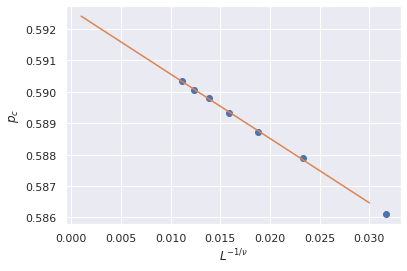

In [15]:
x = data[:,0]**(-one_by_nu)
plt.plot(x, data[:,1], 'o')
regress = stats.linregress(x, data[:,1])
x = np.linspace(0.03, 0.001, 10)
y = x*regress[0] + regress[1]
plt.plot(x, y)

plt.xlabel(r"$L^{-1/\nu}$")
plt.ylabel(r"$p_c$")

In [13]:
print("intercept is the pc")
print(regress[1])

intercept is the pc
0.5727247483244895


## Plotting

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LinregressResult(slope=-0.20507650054652243, intercept=0.5926136680057711, rvalue=-0.9997275335191409, pvalue=2.3532775510598376e-09, stderr=0.0021413674506824097)


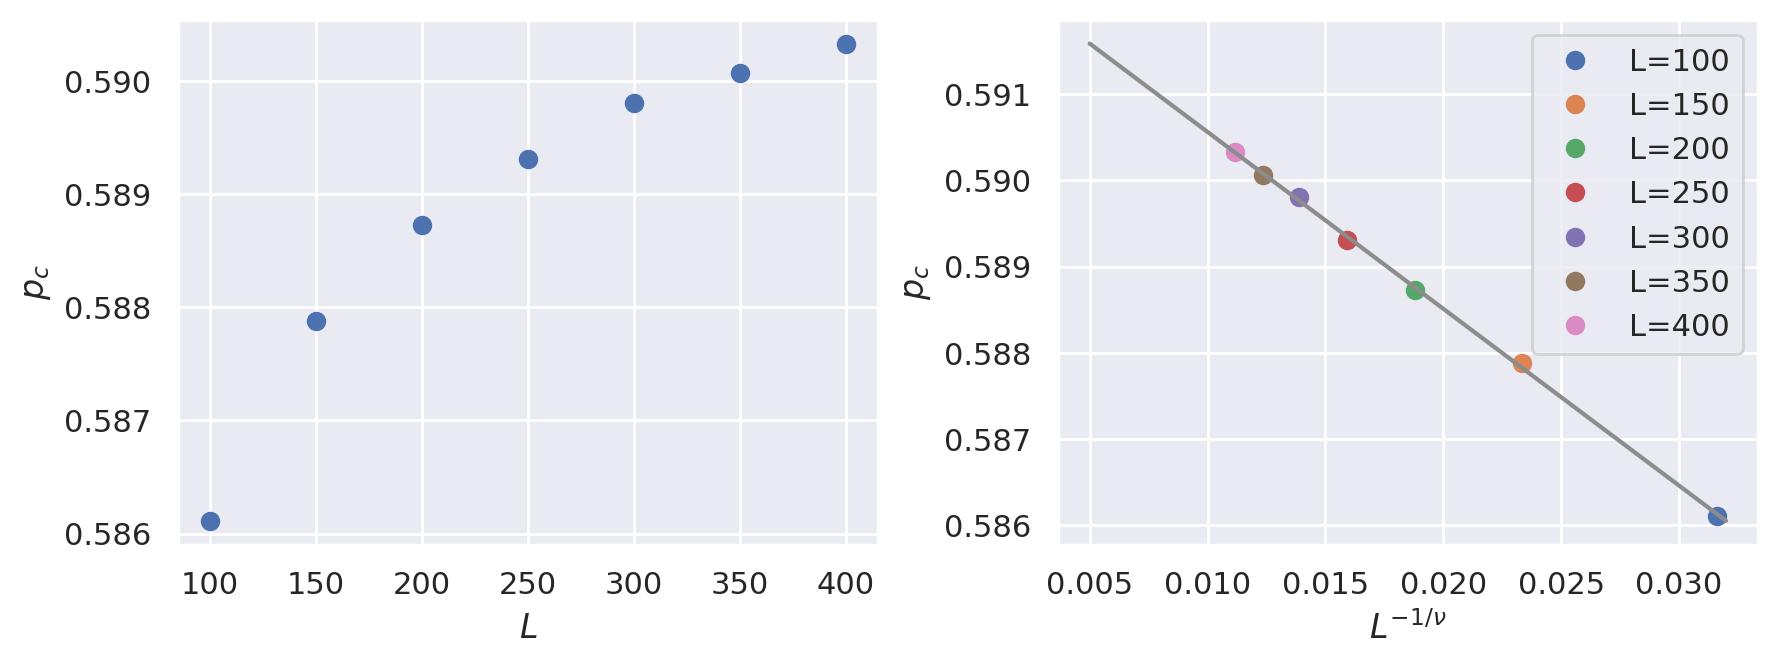

TypeError: list indices must be integers or slices, not tuple

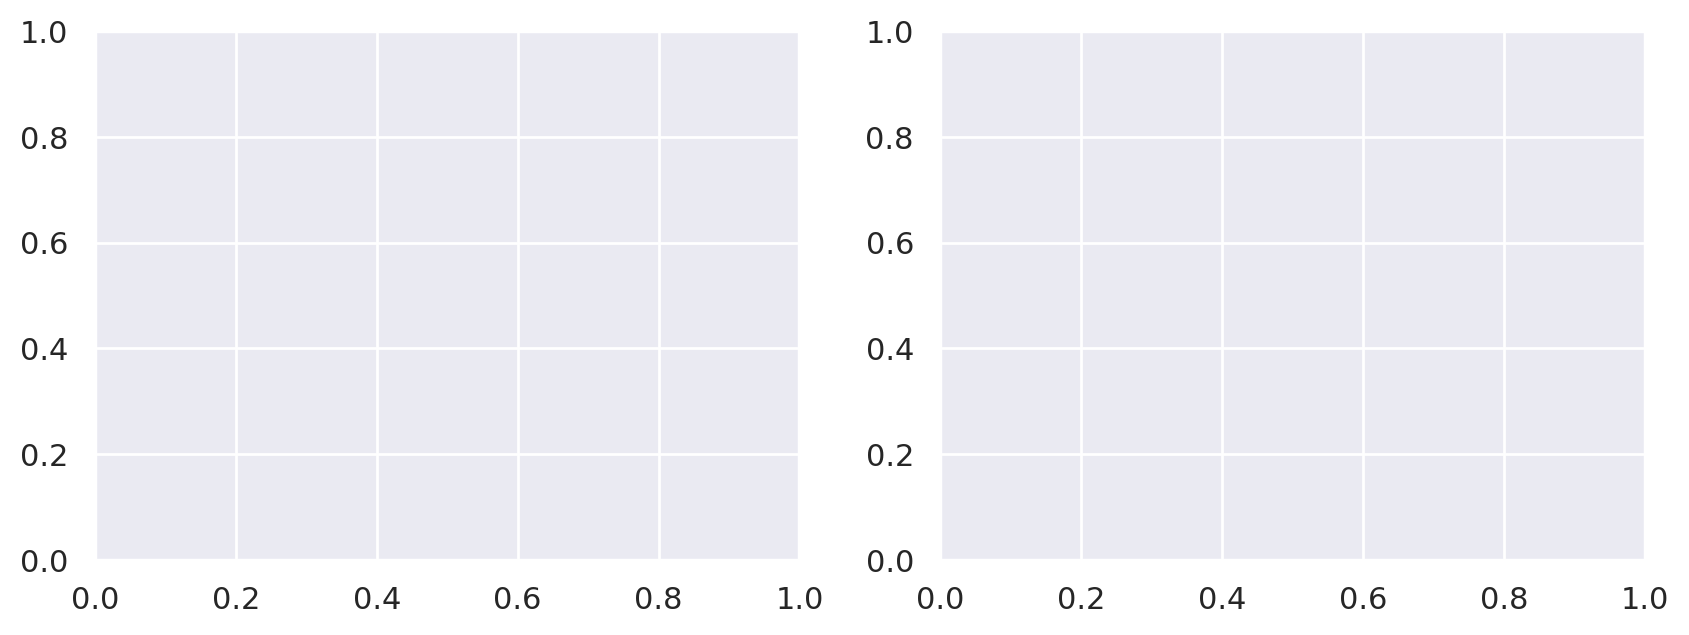

In [15]:

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(10, 3.5))
ax[0].plot(data[:,0], data[:,1], 'o')
# plt.title(r"$p_c$ vs $L$")
ax[0].set_xlabel(r"$L$")
ax[0].set_ylabel(r"$p_c$")
ax[0].set_position([0.1, 0.2, 0.35, 0.75])

x = data[:,0]**(-one_by_nu)
ax[1].plot(x, data[:,1], 'o')
regress = stats.linregress(x, data[:,1])
x = np.linspace(0.032, 0.005, 10)
y = x*regress[0] + regress[1]
ax[1].plot(x, y)

ax[1].set_xlabel(r"$L^{-1/\nu}$")
ax[1].set_ylabel(r"$p_c$")
ax[1].set_position([0.54, 0.2, 0.35, 0.75])

filename = fig_root + "finding-pc.eps"
plt.savefig(filename)
print(regress)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LinregressResult(slope=-0.20507650054652243, intercept=0.5926136680057711, rvalue=-0.9997275335191409, pvalue=2.3532775510598376e-09, stderr=0.0021413674506824097)


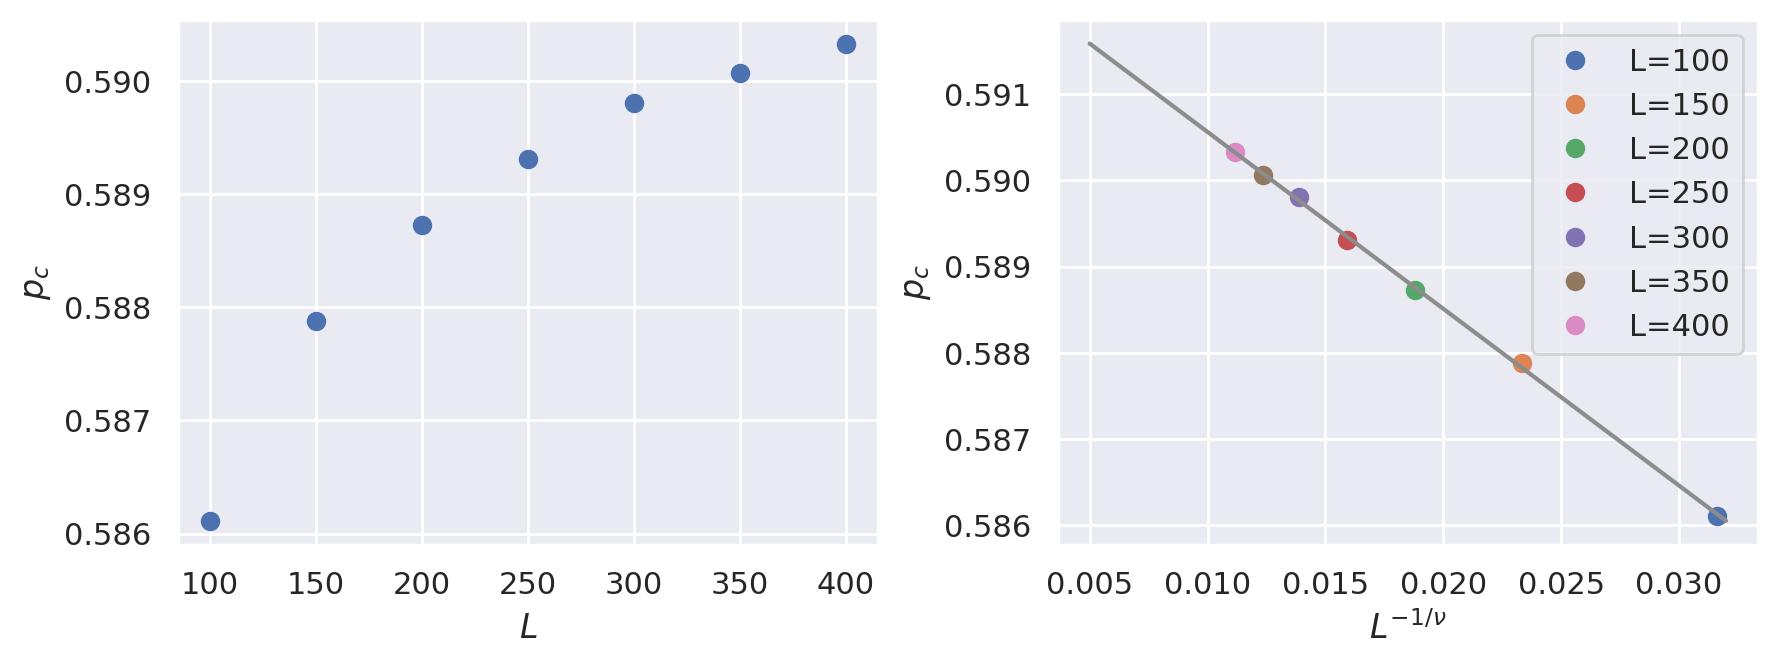

In [18]:
fig, ax = plt.subplots(1, 2, dpi=200, figsize=(10, 3.5))

lengths = list(pc_dict.keys())
lengths.sort()
for L in lengths:
    x = L**(-one_by_nu)
    ax[1].plot(x, pc_dict[L], 'o', label="L={}".format(L))
    pass

ax[0].plot(data[:,0], data[:,1], 'o')
# plt.title(r"$p_c$ vs $L$")
ax[0].set_xlabel(r"$L$")
ax[0].set_ylabel(r"$p_c$")
ax[0].set_position([0.1, 0.2, 0.35, 0.75])

x = data[:,0]**(-one_by_nu)

regress = stats.linregress(x, data[:,1])
x = np.linspace(0.032, 0.005, 10)
y = x*regress[0] + regress[1]


ax[1].plot(x, y)
ax[1].legend()
ax[1].set_xlabel(r"$L^{-1/\nu}$")
ax[1].set_ylabel(r"$p_c$")
ax[1].set_position([0.54, 0.2, 0.35, 0.75])

filename = fig_root + "finding-pc.eps"
plt.savefig(filename)
print(regress)


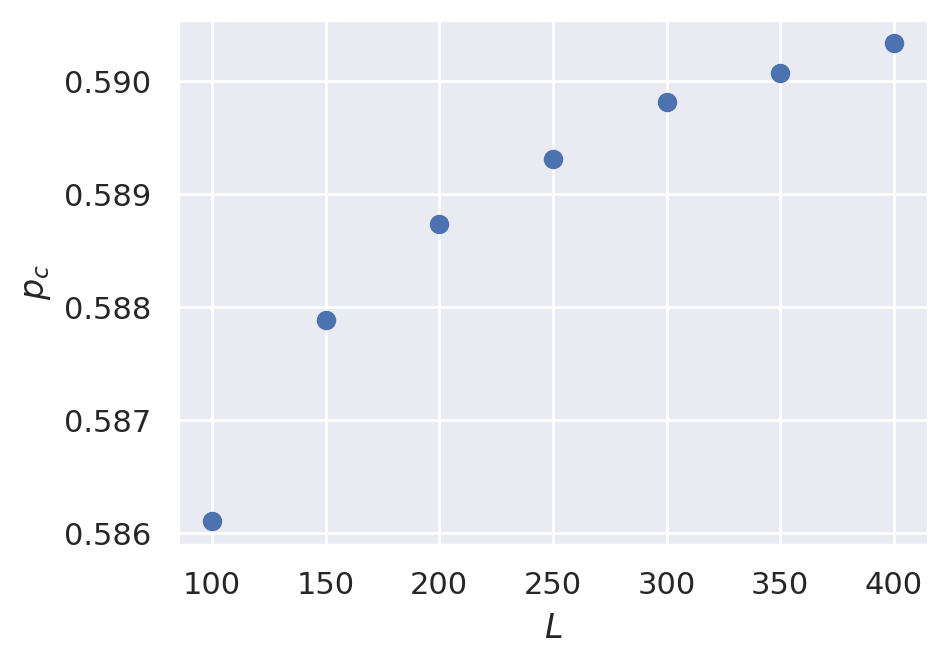

In [21]:
fig = plt.figure(dpi=200, figsize=(5, 3.5))
plt.plot(data[:,0], data[:,1], 'o')
# plt.title(r"$p_c$ vs $L$")
plt.xlabel(r"$L$")
plt.ylabel(r"$p_c$")
ax = plt.gca()
ax.set_position([0.2, 0.2, 0.75, 0.75])

filename = fig_root + "finding-pc-1.eps"
plt.savefig(filename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


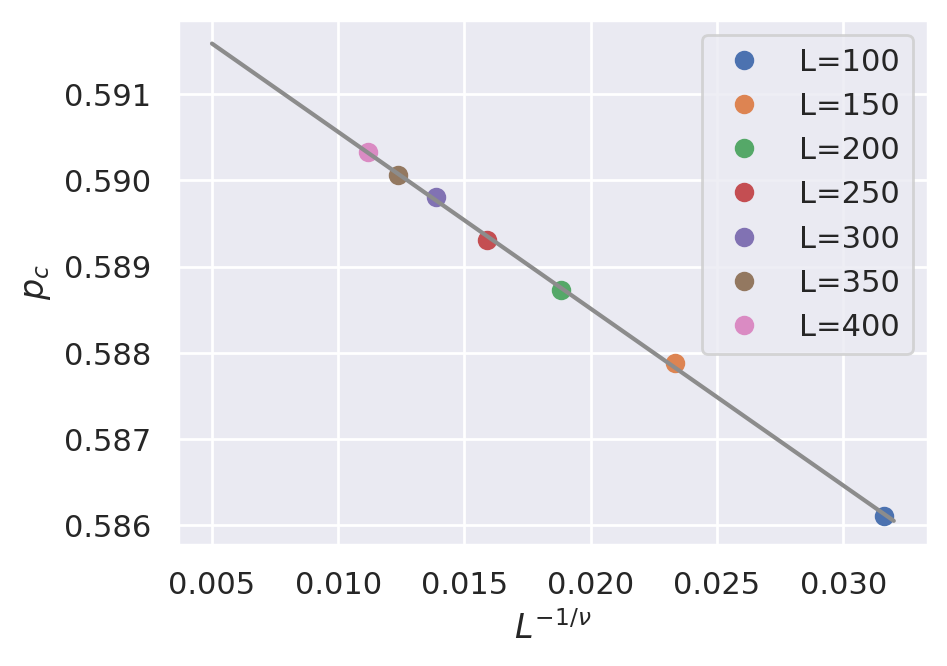

In [20]:
fig = plt.figure(dpi=200, figsize=(5, 3.5))
ax = plt.gca()

lengths = list(pc_dict.keys())
lengths.sort()
for L in lengths:
    x = L**(-one_by_nu)
    ax.plot(x, pc_dict[L], 'o', label="L={}".format(L))
    pass

x = data[:,0]**(-one_by_nu)
regress = stats.linregress(x, data[:,1])
x = np.linspace(0.032, 0.005, 10)
y = x*regress[0] + regress[1]
ax.plot(x, y)
ax.legend()
ax.set_xlabel(r"$L^{-1/\nu}$")
ax.set_ylabel(r"$p_c$")

ax.set_position([0.2, 0.2, 0.75, 0.75])

filename = fig_root + "finding-pc-2.eps"
plt.savefig(filename)